Name : Soham Vashi
Batch : 2402

#            BANK MARKETING
Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

# Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


# About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

# Dataset Attributes

Here is the description of all the variables:                                                                                   
•	Variable: Definition                                                                                                        
•	ID: Unique client ID                                                                                                        
•	age: Age of the client                                                                                                      
•	job: Type of job                                                                                                            
•	marital: Marital status of the client                                                                                       
•	education: Education level                                                                                                  
•	default: Credit in default.                                                                                                 
•	housing: Housing loan                                                                                                       
•	loan: Personal loan                                                                                                         
•	contact: Type of communication                                                                                              
•	month: Contact month                                                                                                        
•	day_of_week: Day of week of contact                                                                                         
•	duration: Contact duration                                                                                                  
•	campaign: number of contacts performed during this campaign to the client                                                   
•	pdays: number of days that passed by after the client was last contacted                                                     
•	previous: number of contacts performed before this campaign                                                                 
•	poutcome: outcome of the previous marketing campaign                                                                         


# Output variable (desired target):

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)

In [1]:
# impotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing training dataset
train=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

In [3]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [109]:
#importing test data
test=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')



In [110]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [111]:
train.shape

(31647, 38)

train dataset contains 31647 rows and 18 columns

In [7]:
test.shape

(13564, 17)

  Test data set contains 13564 rows 17 columns.

In [8]:
#checking for columns of train dataset
train.columns


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [9]:
##checking for columns of test dataset
test.columns


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

Here 'subscribed' column is missing which is target feature.

In [10]:
#Checking for column types of train dataset
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [11]:
#checking for column types of test dataset
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


# Checking for null values

In [14]:
#checking for null values of train dataset
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [15]:
#checking for null values of test dataset
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

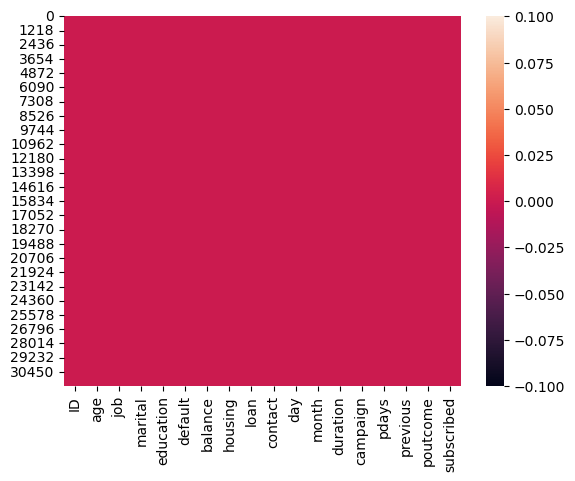

In [16]:
sns.heatmap(train.isnull())

<Axes: >

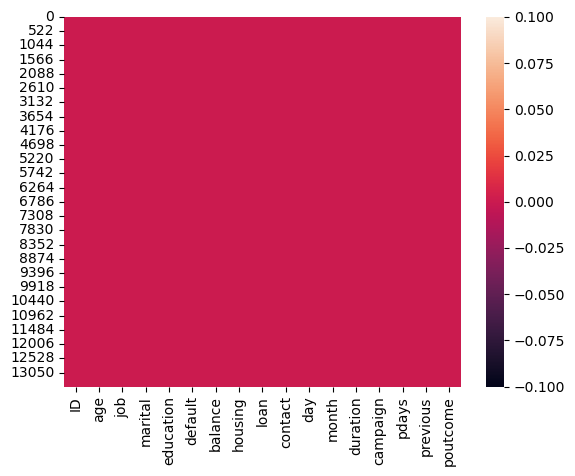

In [17]:
sns.heatmap(test.isnull())

There are no null values are present in both train and test datasets.

In [18]:
#checking for duplicate values
train.duplicated().sum()
test.duplicated().sum()

0

In [19]:
#checking for unique values in each features of train dataset
for i in train.columns:
    print(train[i].value_counts())
    print('\n','__________________________________________________________________________________________________')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64

 __________________________________________________________________________________________________
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64

 __________________________________________________________________________________________________
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

 __________________________________________________________________________________________________
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

 _________

In [20]:
#checking for unique values in each features of test dataset
for i in test.columns:
    print(test[i].value_counts())
    print('\n','__________________________________________________________________________________________________')

38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64

 __________________________________________________________________________________________________
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64

 __________________________________________________________________________________________________
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64

 __________________________________________________________________________________________________
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

 _______________________

Theese are the value counts of each columns of train and test dataset .Here we can observe that there are some unknown values are present in both the dataset.

In [21]:
#Display the total number of unknown values present in train dataset
train[train == 'unknown'].count()

ID                0
age               0
job             206
marital           0
education      1314
default           0
balance           0
housing           0
loan              0
contact        9177
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome      25929
subscribed        0
dtype: int64

In [22]:
#Display the total number of unknown values present in test dataset
test[test== 'unknown'].count()

ID               0
age              0
job             82
marital          0
education      543
default          0
balance          0
housing          0
loan             0
contact       3843
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     11030
dtype: int64

In [25]:
train.loc[train['contact']=='unknown']
         

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
13,480,39,management,single,secondary,no,1877,yes,no,unknown,6,may,185,1,-1,0,unknown,no
14,3260,43,blue-collar,married,secondary,no,960,yes,no,unknown,15,may,436,1,-1,0,unknown,no
15,9701,41,services,single,secondary,no,260,no,no,unknown,6,jun,75,1,-1,0,unknown,no
16,2843,53,technician,married,secondary,no,719,yes,no,unknown,14,may,230,1,-1,0,unknown,no
20,4554,60,management,married,tertiary,no,328,yes,no,unknown,20,may,72,5,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31633,9847,50,technician,married,tertiary,no,3117,no,no,unknown,9,jun,174,1,-1,0,unknown,no
31634,8652,30,technician,single,tertiary,no,432,yes,yes,unknown,3,jun,180,3,-1,0,unknown,no
31639,279,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no


In [26]:
test.loc[train['contact']=='unknown']

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13,1738,35,technician,married,secondary,no,55,yes,no,unknown,9,may,79,4,-1,0,unknown
14,9565,53,management,married,unknown,no,12001,no,no,unknown,6,jun,207,1,-1,0,unknown
15,29743,59,unemployed,single,secondary,no,865,no,no,cellular,4,feb,1086,1,-1,0,unknown
16,34946,27,technician,single,secondary,no,2,yes,yes,cellular,6,may,554,2,356,1,failure
20,1572,32,management,single,tertiary,no,394,yes,no,unknown,8,may,466,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13553,20780,50,self-employed,married,secondary,no,36,no,no,cellular,13,aug,104,10,-1,0,unknown
13554,11568,51,unemployed,married,secondary,no,-267,no,yes,unknown,19,jun,208,2,-1,0,unknown
13555,23487,34,management,single,tertiary,no,1070,no,no,cellular,28,aug,91,15,-1,0,unknown
13556,27122,46,self-employed,married,primary,no,3155,yes,no,cellular,21,nov,271,1,-1,0,unknown


# Handling unknown values

In [112]:
def unknwn_value(value):
    if ((value.dtype =='float64') or (value.dtype =='int64')):
        value[value == -1] = np.nan
        value=value.fillna(value.median())
    else:
        value[value=='unknown'] = np.nan
        value=value.fillna(value.mode()[0])
        
    return value

In [113]:
#applying values in unknown values 
train= train.apply(unknwn_value)
test= test.apply(unknwn_value)

In [114]:
#checking for unknown values
train[train == 'unknown'].count()


age                    0
job                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
subscribed             0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
dtype: int64

In [106]:
Test[Test == 'unknown'].count()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [118]:
train.shape

(31647, 38)

In [33]:
test.shape

(13564, 16)

In [17]:
# Splitting the training dataset in Categorical and numerical for visualization and further analysis
# Categorical
categorical_train=train.select_dtypes(include=['object'])

# Numerical
numerical_train= train.select_dtypes(include=['float64','int64'])

In [18]:
categorical_train.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

In [19]:
numerical_train.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [20]:
# Splitting the testing dataset in Categorical and numerical for visualization and further analysis
# Categorical
categorical_test=test.select_dtypes(include=['object'])

# Numerical
numerical_test= test.select_dtypes(include=['float64','int64'])

In [21]:
categorical_test.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [22]:
numerical_test.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [23]:
#checking for target value for each feature
for i in train:
    print(pd.crosstab(train[i],train['subscribed']))
    print('\n','**********************************************************')

subscribed  no  yes
age                
18           3    5
19          15    7
20          25   14
21          33   15
22          61   25
..          ..  ...
90           0    1
92           0    1
93           0    1
94           1    0
95           0    1

[76 rows x 2 columns]

 **********************************************************
subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6533  515
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129

 **********************************************************
subscribed     no   yes
marital                
divorced     3185   445
married     17176  1919
single       7571  1351

 **********************************************************
subscribed     no   yes
education              
primary      4381   427
secondary   15665

# Exploratory Data Analysis(EDA) & Visualization

<Axes: xlabel='subscribed', ylabel='count'>

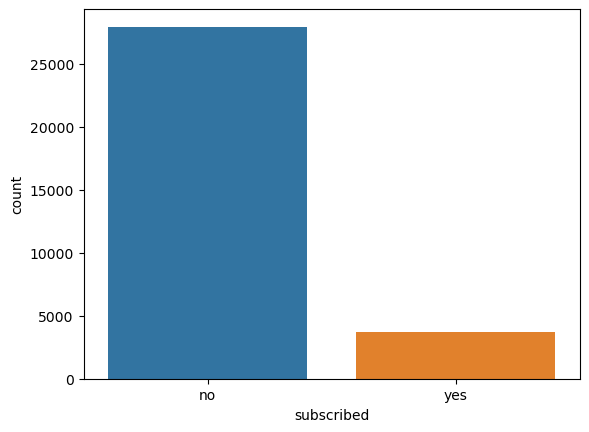

In [41]:
#count of target variable
sns.countplot(data=train,x='subscribed')

There are peolpe who is not subscribed then the ones who are subscribed.

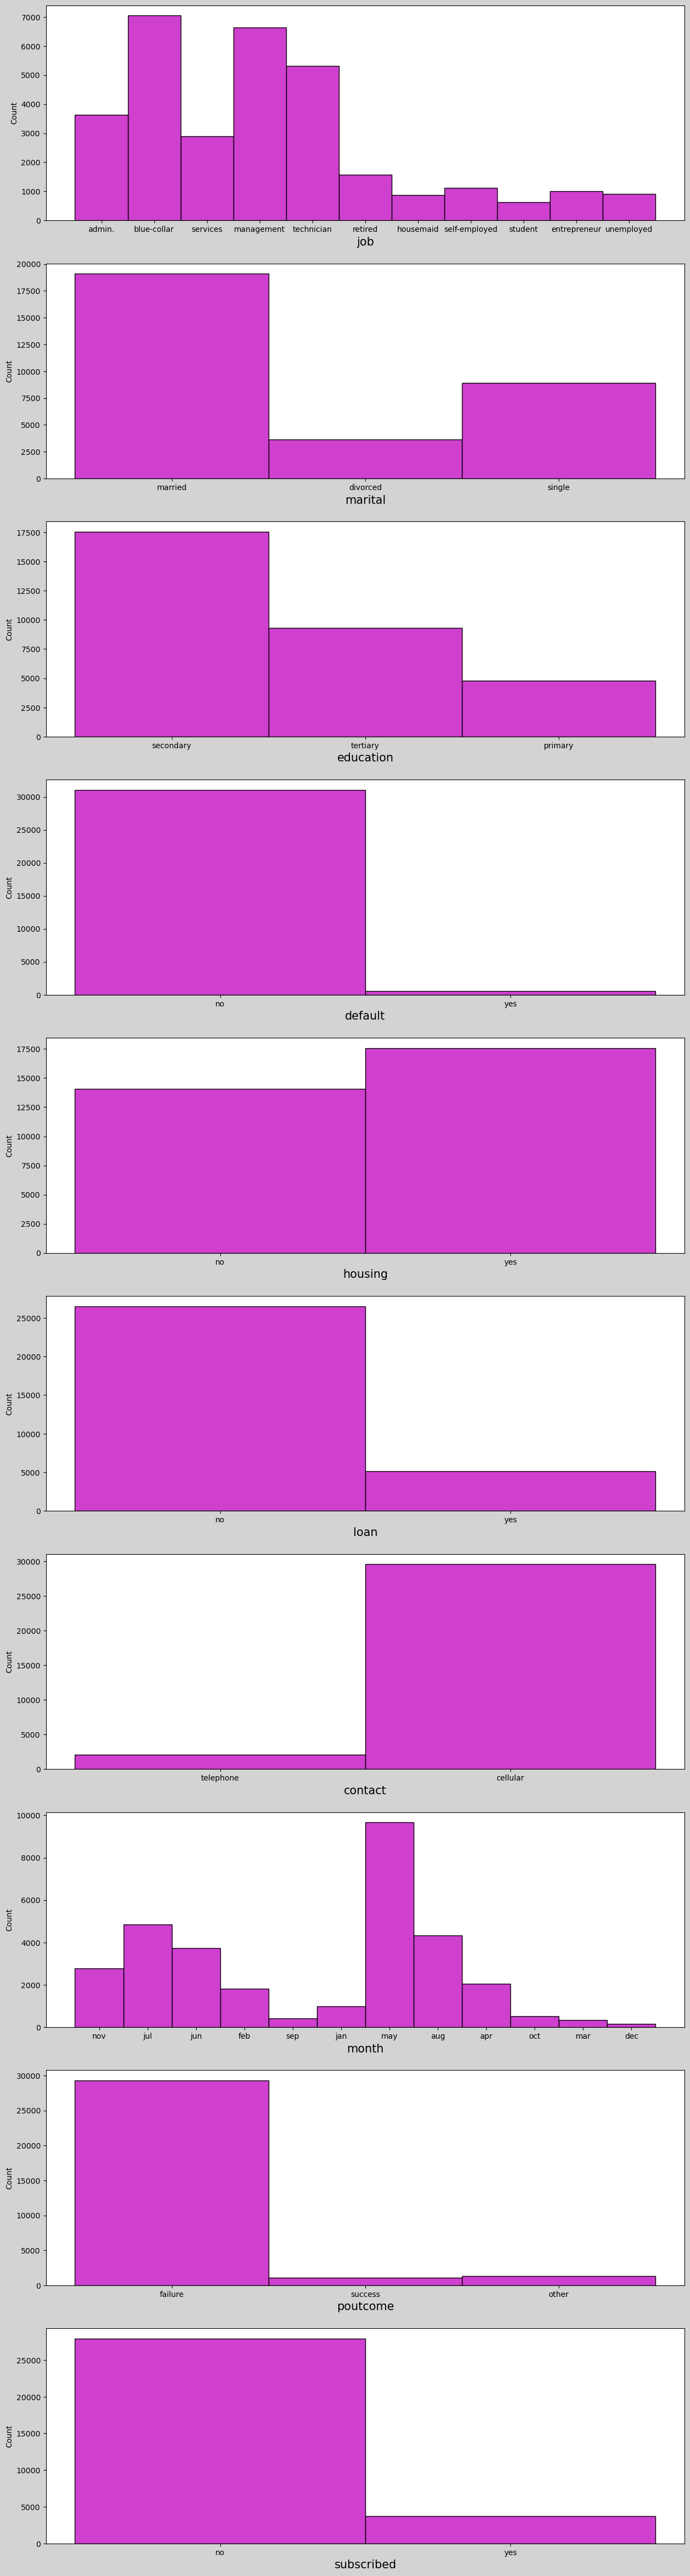

In [42]:
#univarient visualization
plt.figure(figsize=(15,60), facecolor='lightgrey')
plotnumber=1
for column in categorical_train:
    if plotnumber<=10:
        ax=plt.subplot(10,1,plotnumber)
        sns.histplot(train[column], color ='m')
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()  

Theese plots gives the insights about subscription .

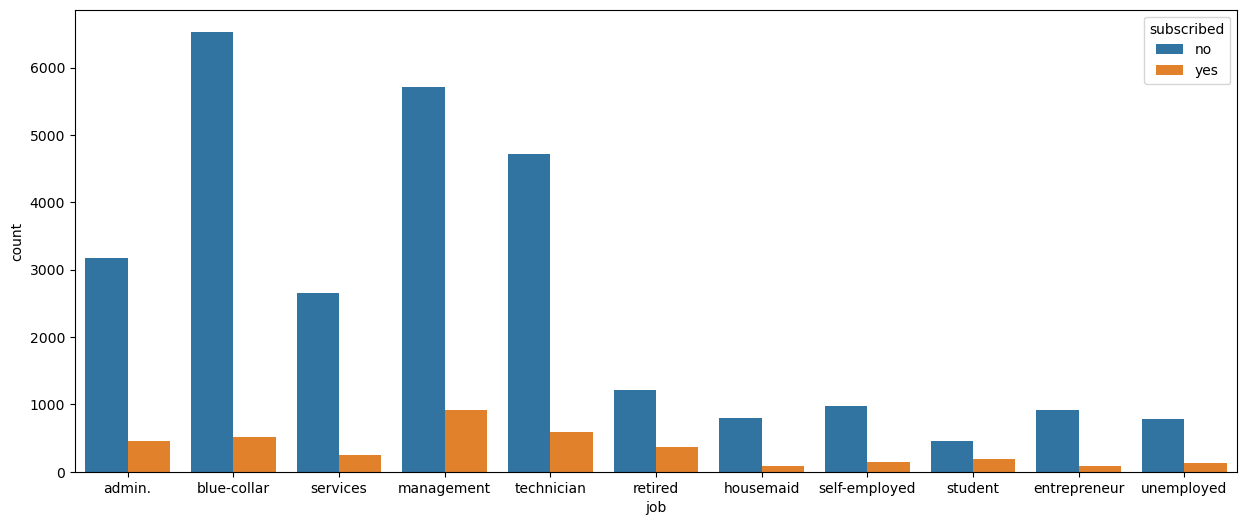

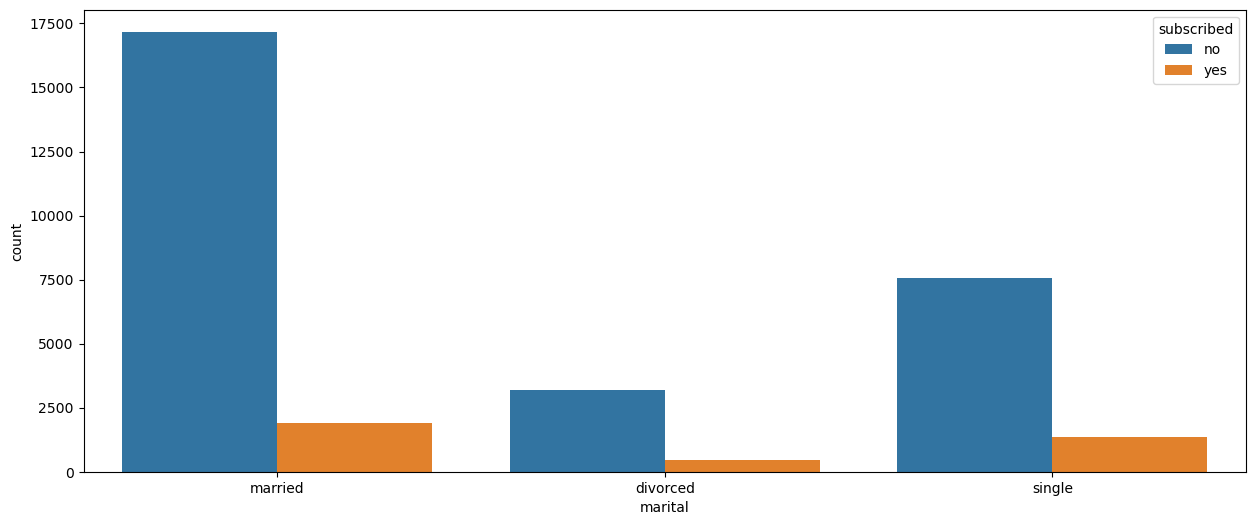

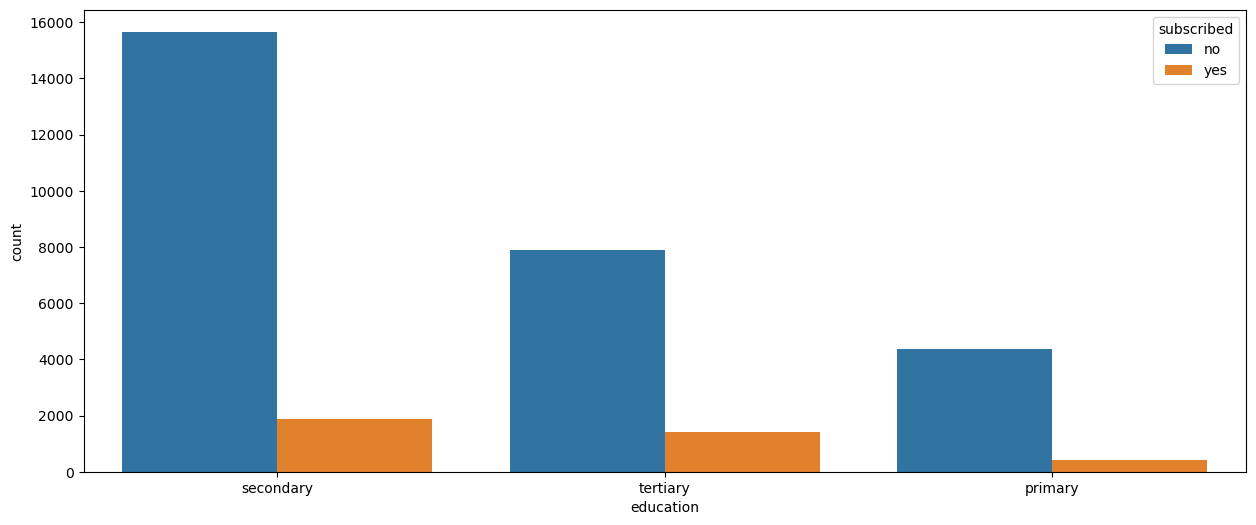

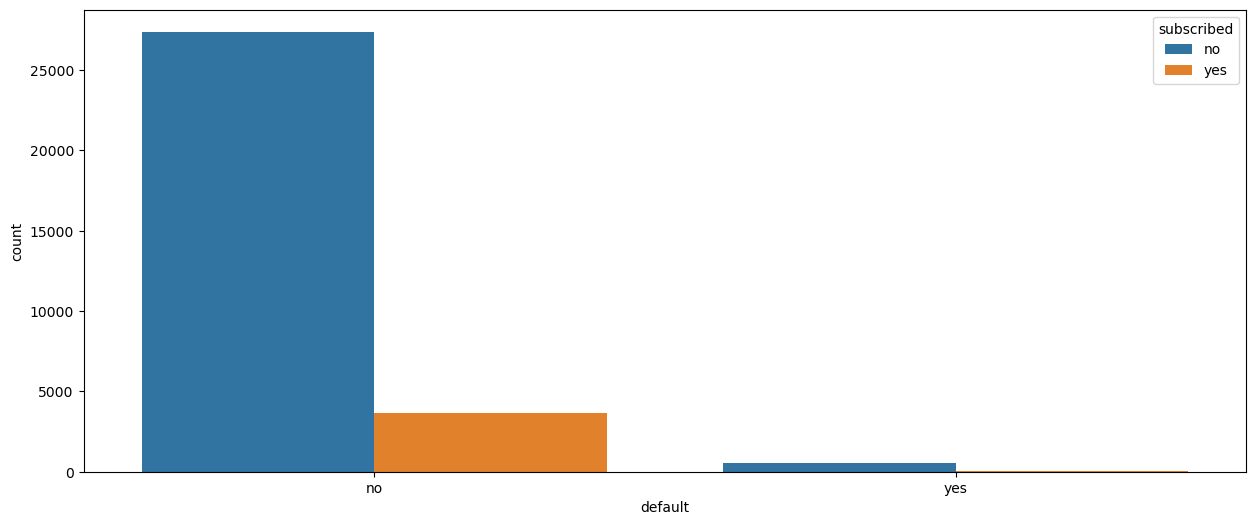

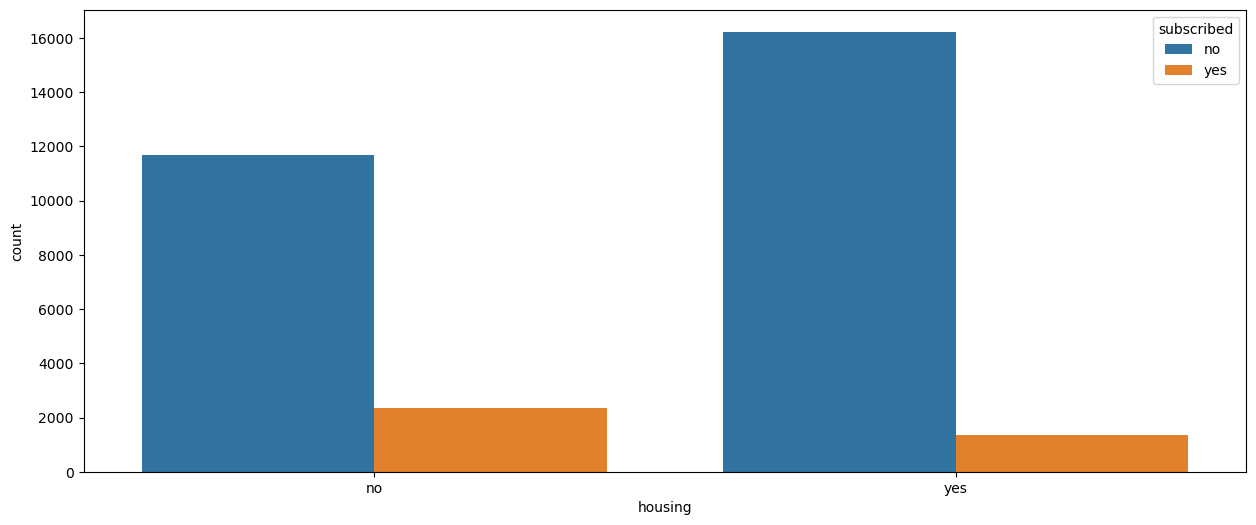

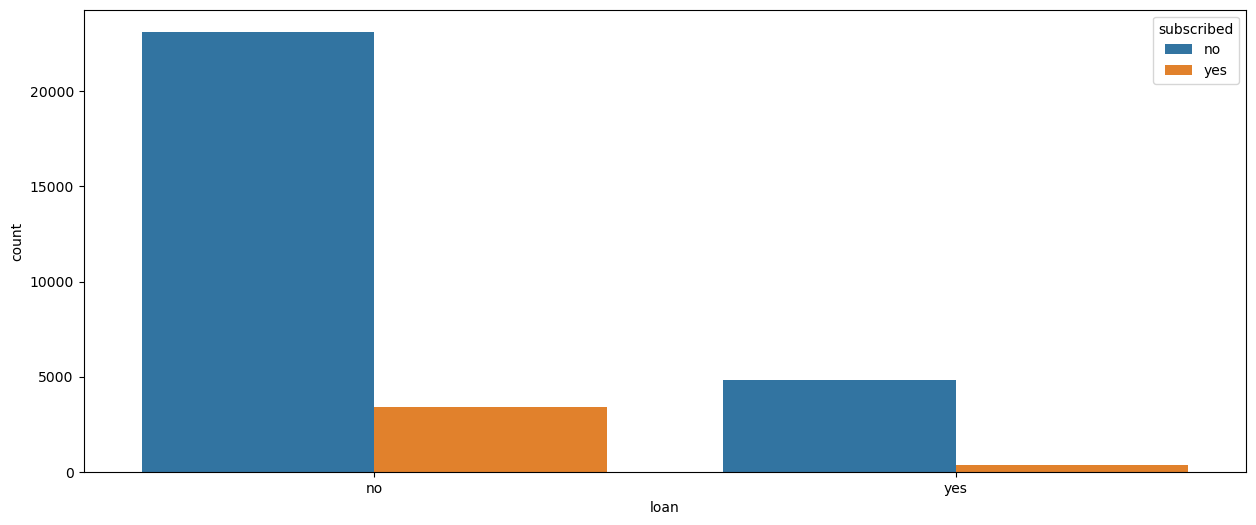

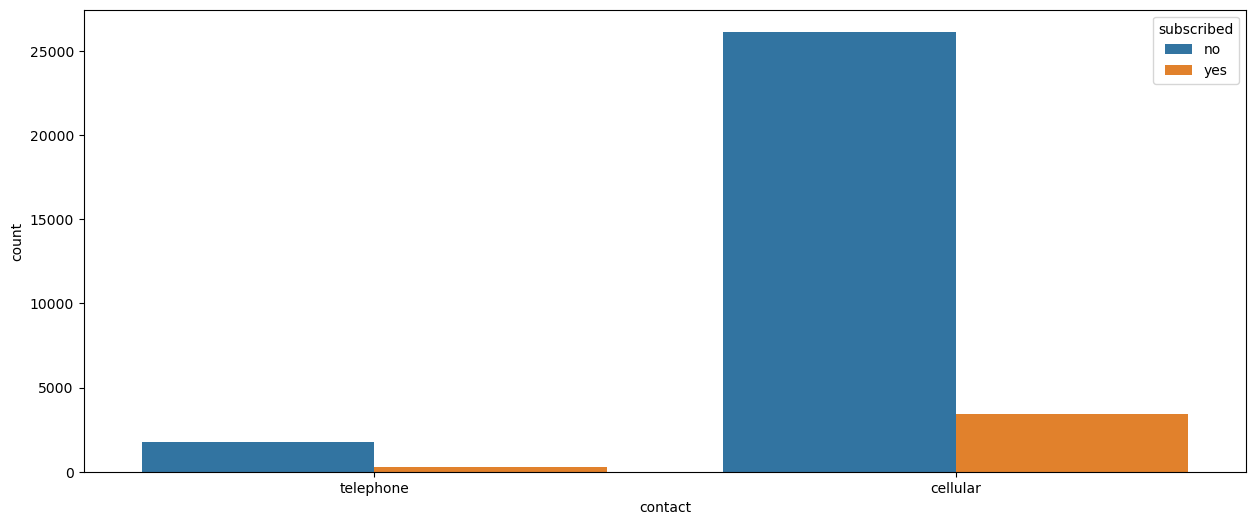

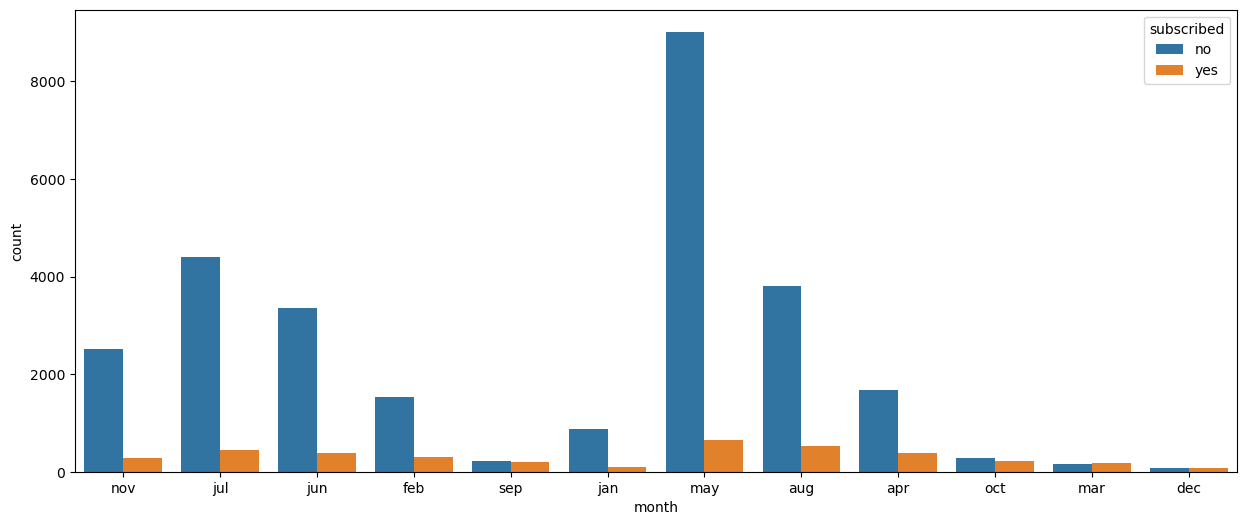

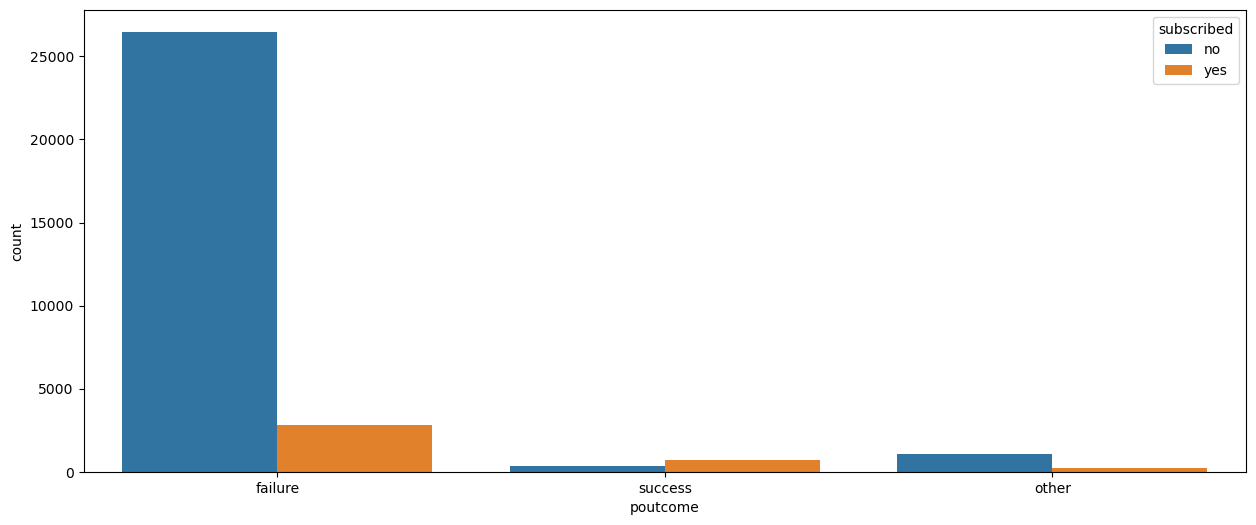

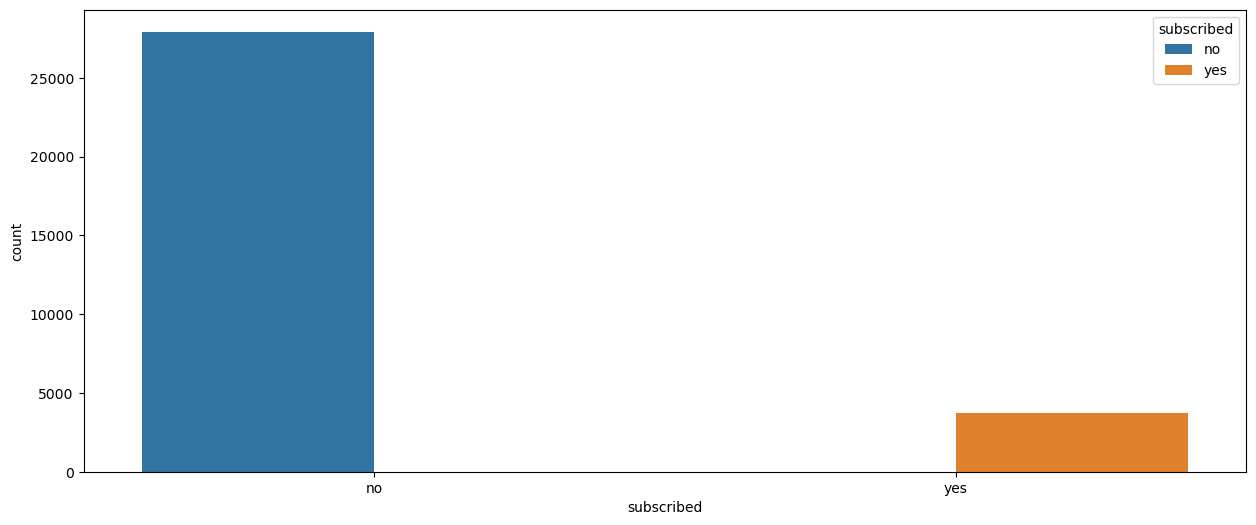

In [43]:
#bivarient visualisation
for i in categorical_train:
    plt.figure(figsize = (15,6))
    sns.countplot(data= train, x = i, hue = 'subscribed')

Observations:
1) Majority of blue-collar job people didnt subscribed to term deposit while management job did subscribed to term deposit.
2) People with secondary education are targeted more compared with other education. 
3) People who have taken housing and personal loan have not subscribed. 
4) People are more contacted through cellular phones and subscribed more than other means of contact People have not been      5) contacted high during the month of May,June,July,Aug. 
6) Married people subcribed more followed by single and divorced. 
7) Overall People subscribed count is too low

Text(0.5, 1.0, 'General trends of all values')

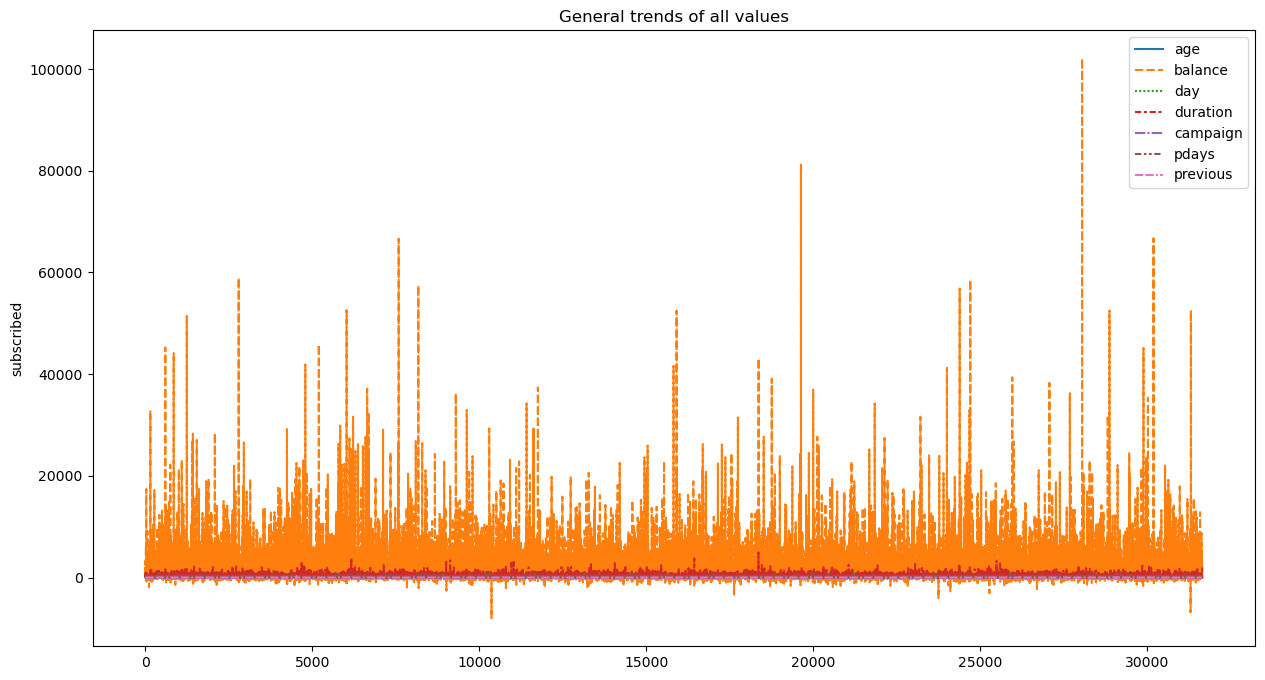

In [44]:
plt.figure(figsize=(15,8))
sns.lineplot(data=train.iloc[:,:-1])
plt.ylabel('subscribed')
plt.title('General trends of all values')

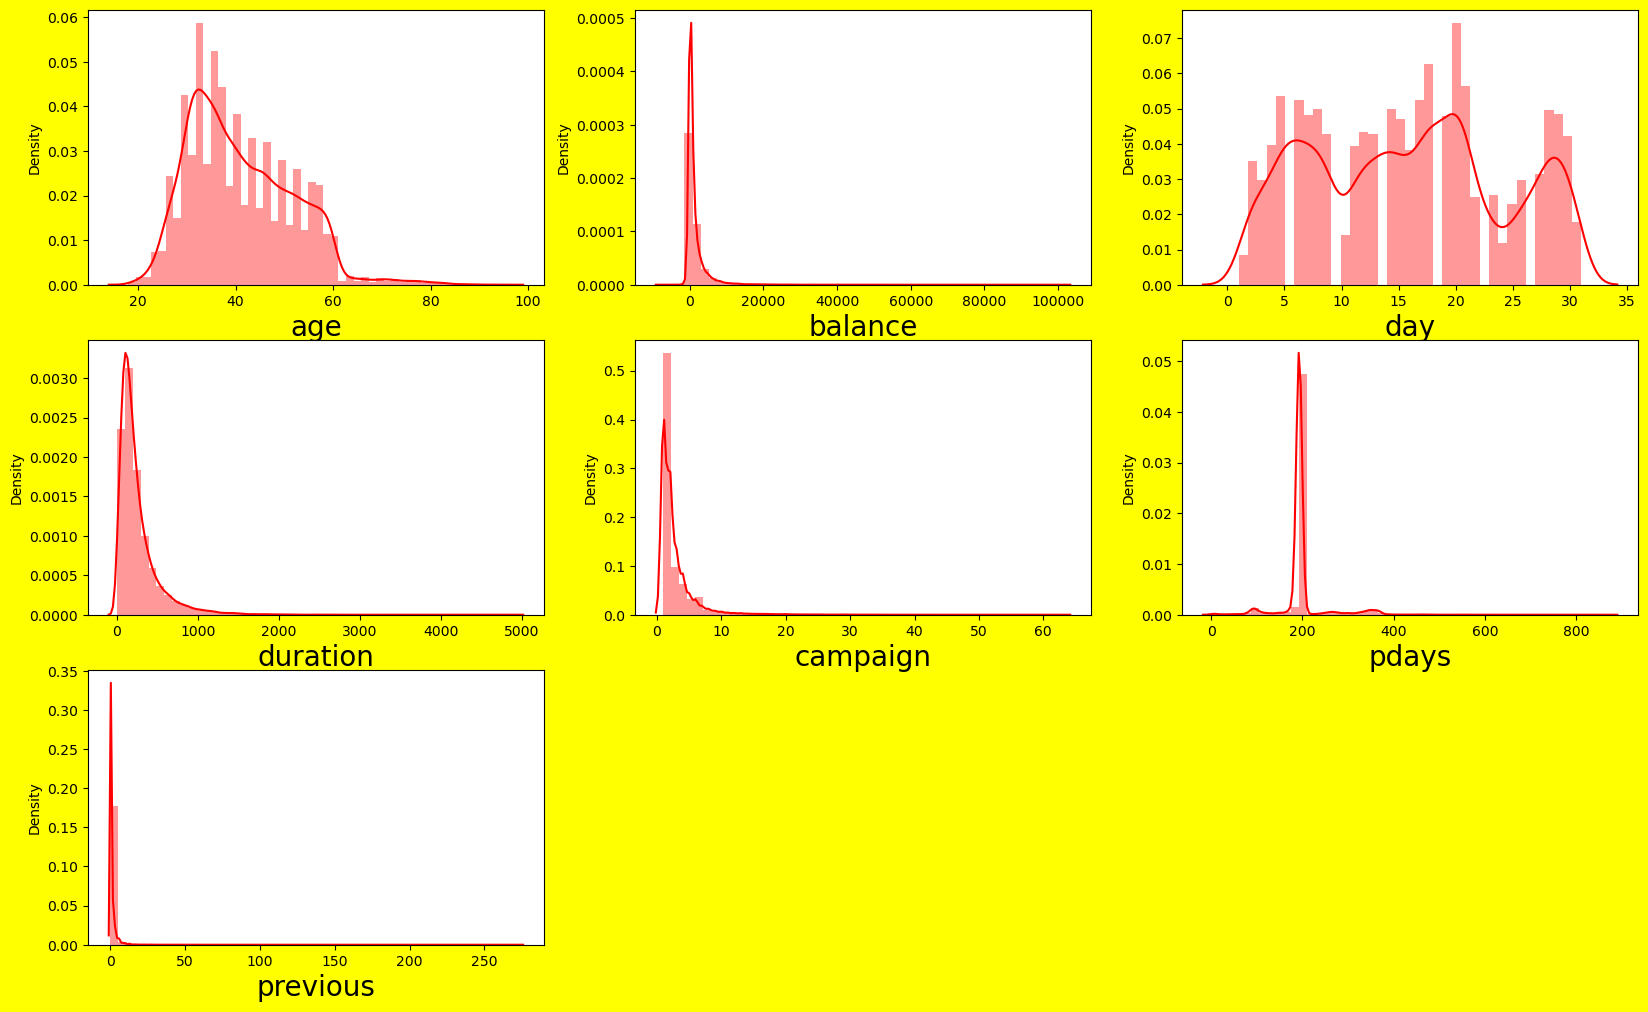

In [45]:
#visualizing the skewness for train dataset
plt.figure(figsize=(20,25),facecolor='yellow')
pltnumber=1
for column in numerical_train:
    if pltnumber<=10:
        ax=plt.subplot(6,3,pltnumber)
        sns.distplot(numerical_train[column],color='r')
        plt.xlabel(column,fontsize=20)
    pltnumber+=1
    
plt.show()
        

1) Age and day columns are normally distrubuted
2) balance,duration,campaign,pdays and previous columns are rught skewed.

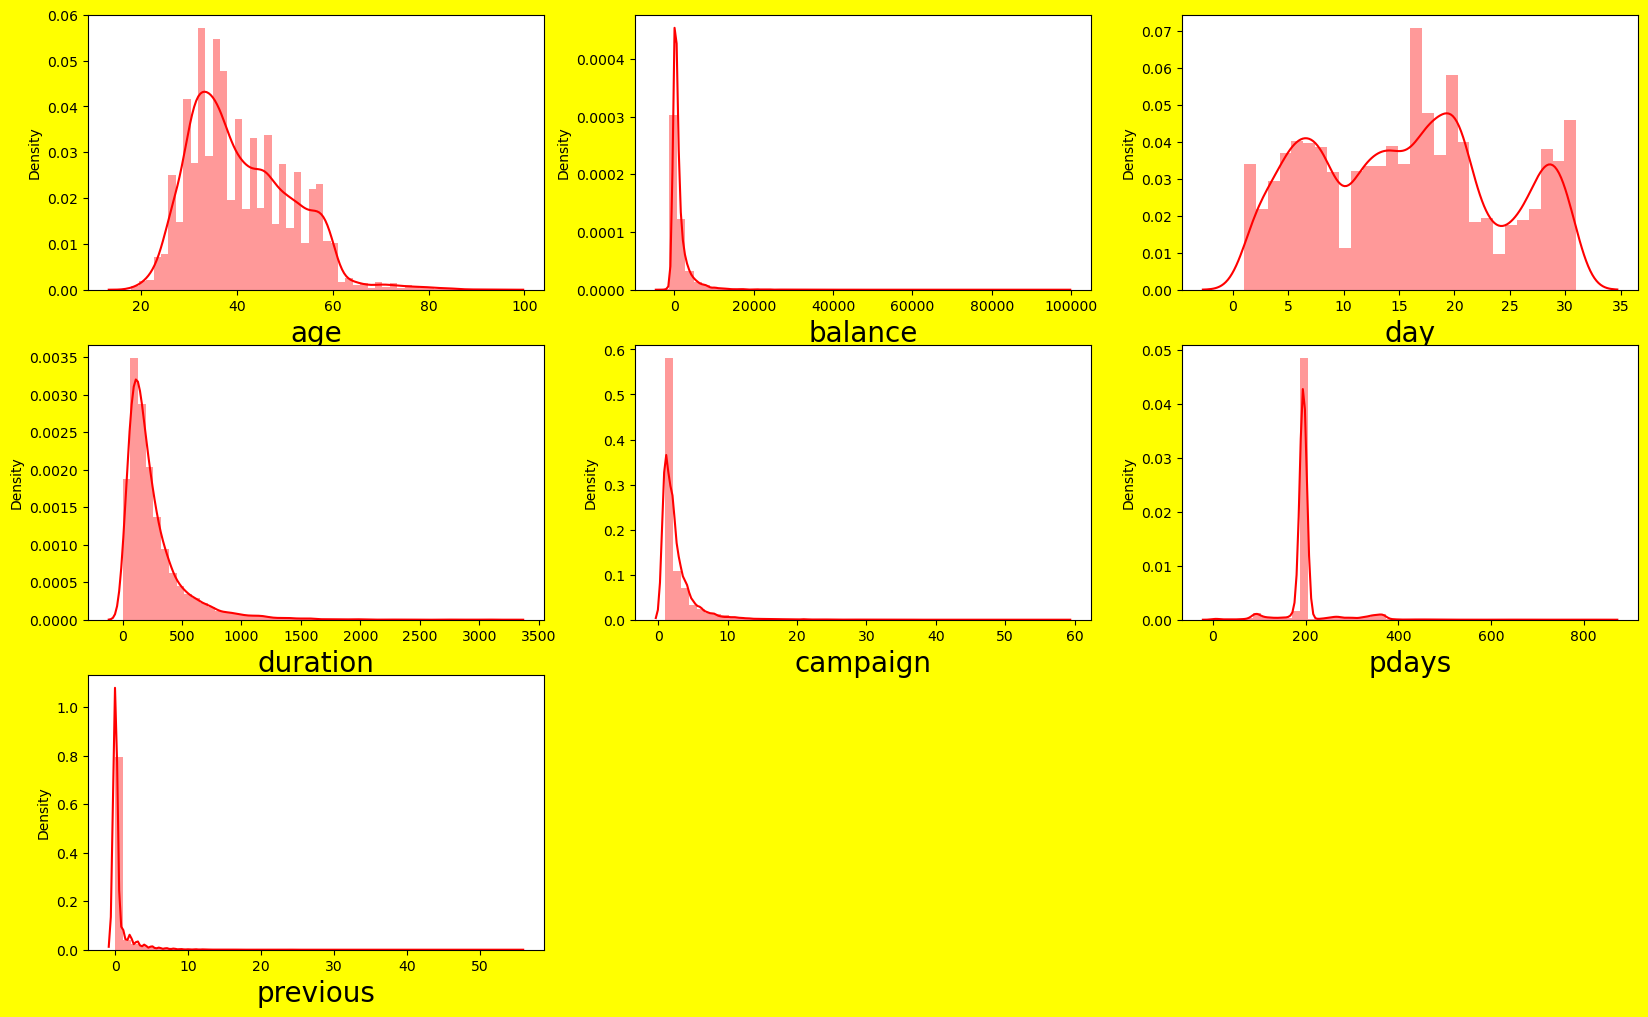

In [46]:
#visualizing the skewness for test dataset
plt.figure(figsize=(20,25),facecolor='yellow')
pltnumber=1
for column in numerical_test:
    if pltnumber<=10:
        ax=plt.subplot(6,3,pltnumber)
        sns.distplot(numerical_test[column],color='r')
        plt.xlabel(column,fontsize=20)
    pltnumber+=1
    
plt.show()
        

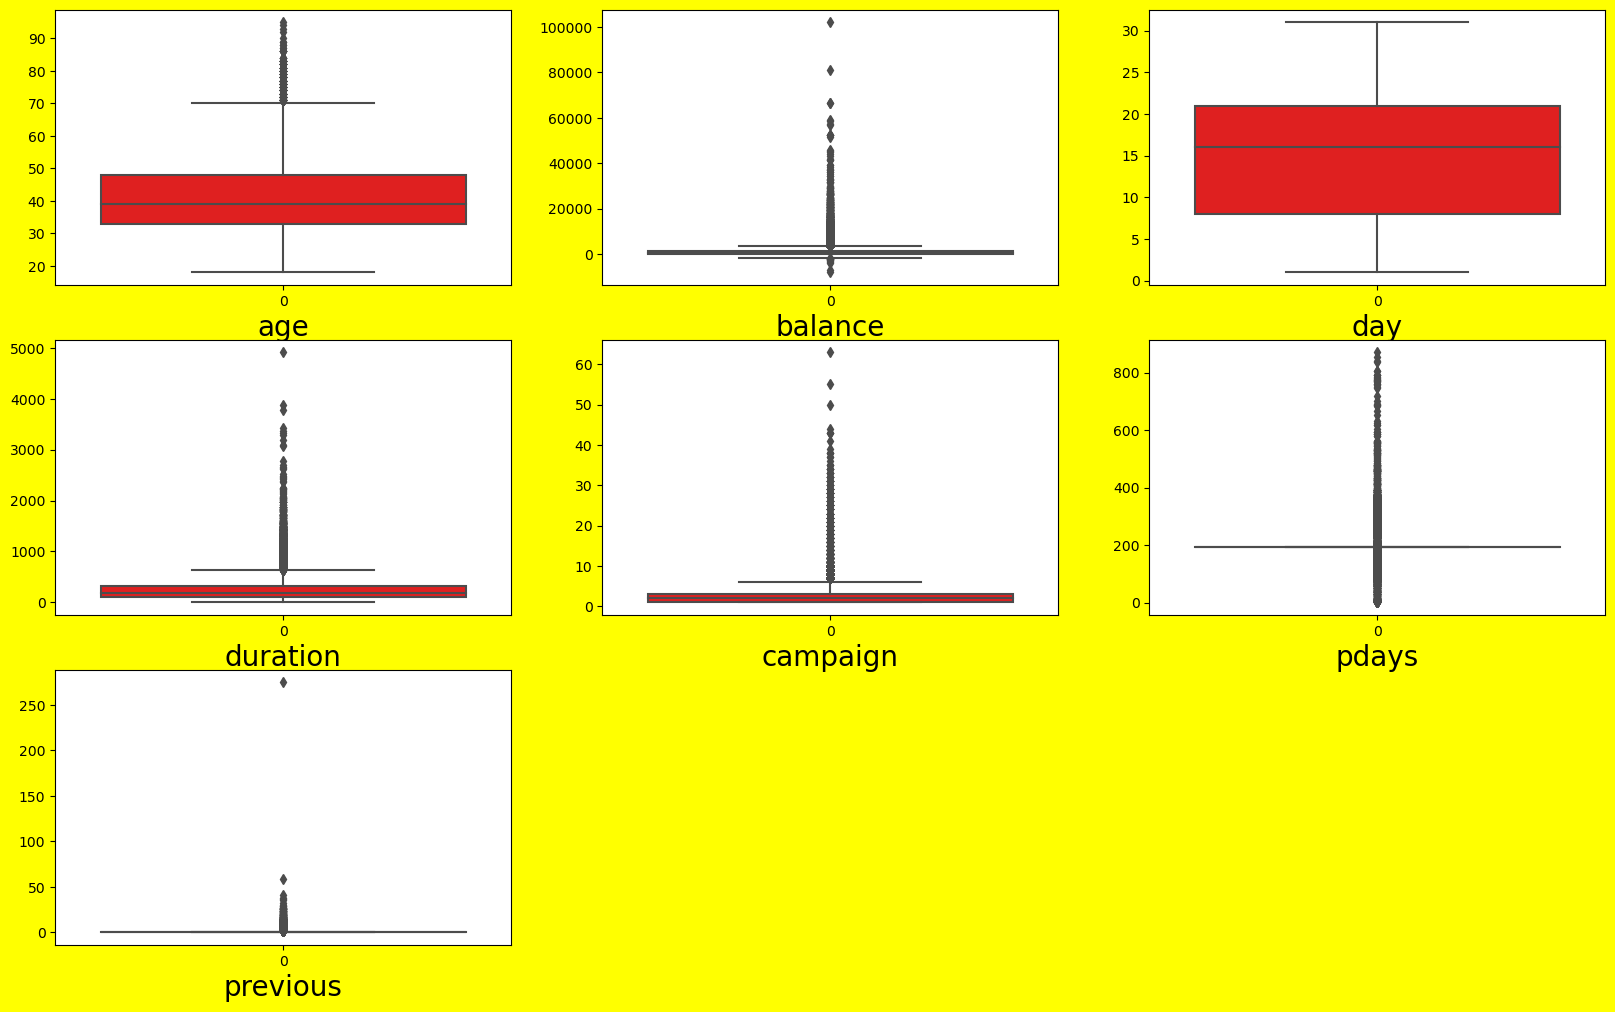

In [47]:
#box plot for train data
#visualizing the skewness for train dataset
plt.figure(figsize=(20,25),facecolor='yellow')
pltnumber=1
for column in numerical_train:
    if pltnumber<=10:
        ax=plt.subplot(6,3,pltnumber)
        sns.boxplot(numerical_train[column],color='r')
        plt.xlabel(column,fontsize=20)
    pltnumber+=1
    
plt.show()
        

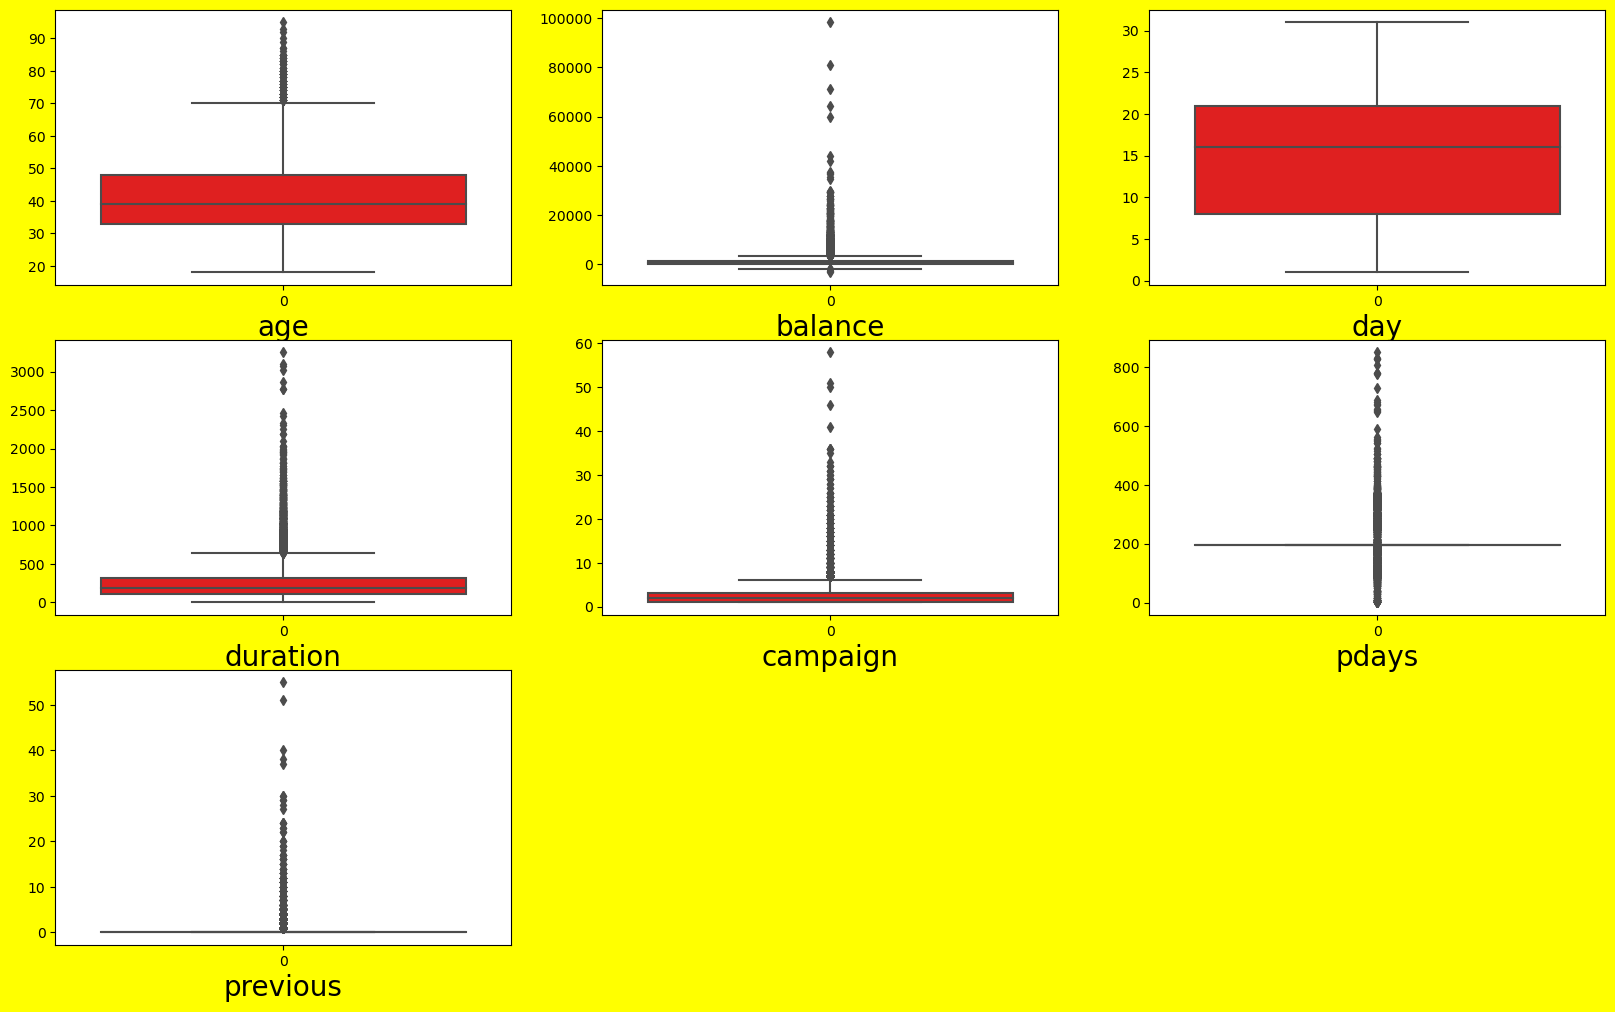

In [48]:
#box plot for test data
#visualizing the skewness for train dataset
plt.figure(figsize=(20,25),facecolor='yellow')
pltnumber=1
for column in numerical_test:
    if pltnumber<=10:
        ax=plt.subplot(6,3,pltnumber)
        sns.boxplot(numerical_test[column],color='r')
        plt.xlabel(column,fontsize=20)
    pltnumber+=1
    
plt.show()
        

There are presence of outliers in both the datasets.

# Stastical Summary

In [49]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1364.390148,15.835466,258.113534,2.765697,198.493349,0.574272
std,10.625134,3028.116241,8.337097,257.118973,3.113830,50.423500,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,74.000000,8.000000,104.000000,1.000000,193.000000,0.000000
50%,39.000000,451.000000,16.000000,180.000000,2.000000,193.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,193.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [50]:
test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.887128,1358.991964,15.738646,258.278679,2.759510,201.032218,0.594441
std,10.604108,3082.758090,8.288174,258.488648,3.060928,51.395376,1.998193
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,102.000000,1.000000,195.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,195.000000,0.000000
75%,48.000000,1413.250000,21.000000,319.000000,3.000000,195.000000,0.000000
max,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


From the describe method in both the dataset we can observe
1) Both dataset contains same count value which means there is no null values are present in the dataset
2) Large gap between 75th percentile and max value indicates the presence of outliers.
3) Mean is greater then meadian which indicates the datasets are right skewed.

# Removing outliers

In [51]:
from scipy.stats import zscore

In [52]:
outliers_train=train[['age','balance','duration','campaign','pdays','previous']]
z=np.abs(zscore(outliers_train))
z

,age,balance,duration,campaign,pdays,previous
0,1.415793,0.187780,0.832754,0.245906,0.108946,0.237059
1,0.937156,0.449590,0.649957,0.245906,0.108946,0.237059
2,1.313627,0.156334,0.070449,0.567059,0.108946,0.237059
3,1.509911,0.634929,2.368149,0.567059,2.270671,1.001336
4,0.937156,0.411282,0.474054,0.567059,0.108946,0.237059
...,...,...,...,...,...,...
31642,1.125392,0.450581,0.552724,0.245906,0.108946,0.237059
31643,1.133439,0.325088,0.699635,0.245906,0.108946,0.237059
31644,0.843038,0.347545,0.859979,0.075247,0.108946,0.237059
31645,1.509911,0.376276,0.918319,1.359859,2.746910,4.716521


In [53]:
threshold=3
np.where(z>3)

(array([   21,    26,    31, ..., 31622, 31645, 31646], dtype=int64),
 array([3, 1, 4, ..., 4, 5, 2], dtype=int64))

In [54]:
z.iloc[21,2]

0.9260977245475122

In [55]:
train1=train[(z<3).all(axis=1)]

In [56]:
train1.shape

(28270, 17)

In [57]:
train.shape

(31647, 17)

In [58]:
print('Data lose percentage :',((train.shape[0]-train1.shape[0])/train.shape[0])*100)

Data lose percentage : 10.670837678136948


In [59]:
#removing outliers from test dataset
outliers_test=test[['age','balance','duration','campaign','pdays','previous']]
z1=np.abs(zscore(outliers_test))
z1

,age,balance,duration,campaign,pdays,previous
0,0.838114,0.402574,0.921849,1.058702,0.117373,0.297500
1,3.499987,0.463241,0.439963,0.574850,0.117373,0.297500
2,0.932421,0.394140,1.616074,0.574850,0.117373,0.297500
3,1.519549,0.784394,0.747754,0.248140,0.117373,0.297500
4,0.387871,0.669552,0.569789,0.574850,0.117373,0.297500
...,...,...,...,...,...,...
13559,0.177969,0.426255,0.426644,0.405281,0.117373,0.297500
13560,1.236630,0.299096,0.387957,0.574850,0.117373,0.297500
13561,0.555195,0.348400,0.473070,0.574850,0.117373,0.297500
13562,1.121034,0.290333,0.194517,0.248140,2.140976,1.203911


In [60]:
threshold=3
np.where(z1>3)

(array([    1,     9,    14, ..., 13550, 13555, 13563], dtype=int64),
 array([0, 4, 1, ..., 2, 3, 4], dtype=int64))

In [61]:
z1.iloc[1,4]

0.1173732046348057

In [62]:
test1=test[(z1<3).all(axis=1)]

In [63]:
test.shape

(13564, 16)

In [64]:
test1.shape

(12052, 16)

In [65]:
print('Percentage of data lose :',((test.shape[0]-test1.shape[0])/test.shape[0])*100)

Percentage of data lose : 11.147154231790033


In [66]:
#checking the skewness of train dataset
train1.skew()

age         0.441744
balance     2.444970
day         0.079564
duration    1.596033
campaign    2.065703
pdays       1.184862
previous    3.619925
dtype: float64

# Correlation

In [24]:
train.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.103248,-0.011056,-0.003870,0.005733,-0.044404,0.005761
balance,0.103248,1.000000,0.003487,0.024263,-0.012038,-0.036641,0.013810
day,-0.011056,0.003487,1.000000,-0.032288,0.159168,-0.054601,-0.048752
duration,-0.003870,0.024263,-0.032288,1.000000,-0.080305,-0.003267,0.001783
campaign,0.005733,-0.012038,0.159168,-0.080305,1.000000,-0.013728,-0.033151
pdays,-0.044404,-0.036641,-0.054601,-0.003267,-0.013728,1.000000,0.097728
previous,0.005761,0.013810,-0.048752,0.001783,-0.033151,0.097728,1.000000


<Axes: >

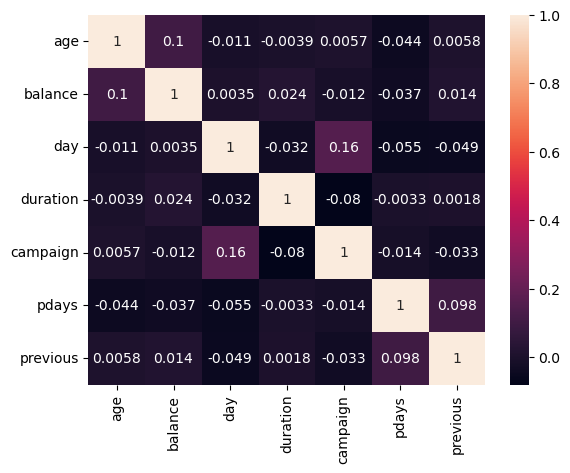

In [25]:
sns.heatmap(train.corr(),annot=True)

In [26]:
test.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.085272,-0.004622,-0.006456,0.002439,-0.056247,-0.011326
balance,0.085272,1.000000,0.006875,0.015364,-0.020484,-0.041158,0.024831
day,-0.004622,0.006875,1.000000,-0.025344,0.170421,-0.058666,-0.060719
duration,-0.006456,0.015364,-0.025344,1.000000,-0.094653,-0.020156,-0.000415
campaign,0.002439,-0.020484,0.170421,-0.094653,1.000000,-0.017606,-0.032366
pdays,-0.056247,-0.041158,-0.058666,-0.020156,-0.017606,1.000000,0.137179
previous,-0.011326,0.024831,-0.060719,-0.000415,-0.032366,0.137179,1.000000


<Axes: >

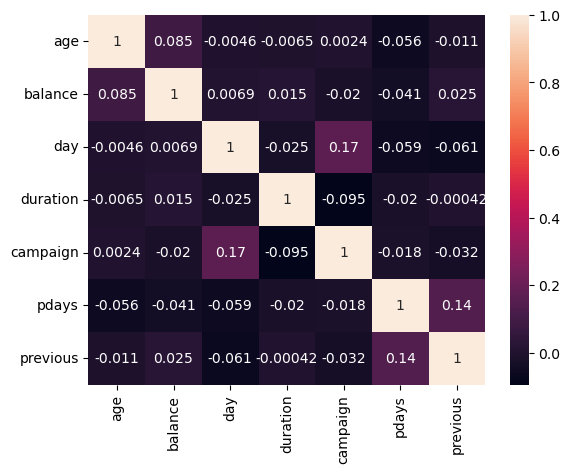

In [29]:
sns.heatmap(test.corr(),annot=True)

# Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [34]:

le= LabelEncoder()
for i in categorical_train.columns:
    if(categorical_train[i].dtypes=='object'):
        categorical_train[i]=le.fit_transform(categorical_train[i].values.reshape(-1,1))
categorical_train.head(10)

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,0,1,1,0,0,0,1,9,0,0
1,1,1,1,0,0,0,0,5,0,0
2,7,1,1,0,1,0,0,5,0,0
3,4,0,2,0,0,0,0,6,2,1
4,9,1,1,0,1,0,0,3,0,0
5,4,2,2,0,1,0,0,3,0,0
6,5,1,1,0,0,0,1,5,0,1
7,9,2,1,0,0,0,0,6,0,0
8,1,0,1,0,1,0,0,3,0,0
9,0,1,1,0,0,0,0,11,0,0


In [132]:
le= LabelEncoder()
for i in categorical_test.columns:
    if(categorical_test[i].dtypes=='object'):
        categorical_test[i]=le.fit_transform(categorical_test[i].values.reshape(-1,1))
categorical_test.head(10)


,job,marital,education,default,housing,loan,contact,month,poutcome
0,7,1,1,0,1,0,0,8,0
1,5,0,0,0,0,0,1,5,0
2,6,2,2,0,1,0,0,8,0
3,7,2,0,0,1,0,1,8,0
4,1,0,1,0,0,1,0,5,0
5,4,2,2,0,1,0,0,5,0
6,1,2,1,0,1,0,0,8,0
7,4,1,1,0,0,0,0,6,0
8,9,0,2,0,0,0,0,7,0
9,0,2,0,0,1,0,0,8,0


In [36]:
#Converting the target variables into 0s and 1s
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

# Splitting dataset 

In [56]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,age,job,balance,day,duration,campaign,pdays,previous,subscribed,marital_divorced,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,56,0,1933.0,19,44,2,193.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,31,1,3.0,20,91,2,193.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,27,7,891.0,18,240,1,193.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,57,4,3287.0,22,867,1,84.0,3,1,1,...,0,1,0,0,0,0,0,0,0,1
4,31,9,119.0,4,380,1,193.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
y= train['subscribed']
x = train.drop('subscribed', axis=1)

# Model Building

In [38]:
#importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score   
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=12)

# Finding Best Random State

In [59]:
train['job']=le.fit_transform(train['job'])

In [60]:
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum accuracy score is', maxAccu ,'on Random_state', maxRS)

Maximum accuracy score is 0.8963665086887835 on Random_state 86


In [66]:
model=[
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        LogisticRegression()]

In [68]:
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print(m,'Evaluztion matics is :')
    print('\n')
    print('Accuracy Score :\n', accuracy_score(y_test, y_pred))
    print('\n')
    print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report :\n',classification_report(y_test, y_pred))
    print('\n')
    

SVC() Evaluztion matics is :


Accuracy Score :
 0.885308056872038


Confusion matrix :
 [[8403    5]
 [1084    3]]


Classification Report :
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      8408
           1       0.38      0.00      0.01      1087

    accuracy                           0.89      9495
   macro avg       0.63      0.50      0.47      9495
weighted avg       0.83      0.89      0.83      9495



DecisionTreeClassifier() Evaluztion matics is :


Accuracy Score :
 0.8694049499736703


Confusion matrix :
 [[7730  678]
 [ 562  525]]


Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      8408
           1       0.44      0.48      0.46      1087

    accuracy                           0.87      9495
   macro avg       0.68      0.70      0.69      9495
weighted avg       0.88      0.87      0.87      9495



KNeighborsClassifier(n_neighbors=12)

Here RandomForestClassifier() is giving best accuracy score that is .90

# Cross Validation Score

In [71]:
rf=RandomForestClassifier()
score = cross_val_score(rf, x, y, cv =5)
print('\n')
print('Cross Validation Score', m, ':')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Standard deviation :",score.std())



Cross Validation Score SVC() :
Score : [0.90315956 0.90695103 0.90172223 0.90393427 0.90425028]
Mean Score : 0.9040034725680355
Standard deviation : 0.00171289420615112


# HyperParameter Tuning


model has been built after hypertunning it the code is not mentioned as it took large time to execute

In [77]:
Final_model = RandomForestClassifier(min_samples_split= 10,min_samples_leaf=1,max_features='sqrt',max_depth=30,
                       n_estimators=500)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


90.47919957872564


# Saving the best model

In [78]:
import pickle

finalmodel = 'Bank_Prediction.pkl'
pickle.dump(Final_model,open(finalmodel,'wb'))

In [79]:
actual=np.array(y_test)
predicted=np.array(Final_model.predict(x_test))

In [80]:
df_com=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_com

,actual values,predicted values
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
9490,0,1
9491,1,1
9492,0,0
9493,0,0


# using the saved model to make predictions for given test dataset

In [ ]:
saved_model=pickle.load(open("Bank_Prediction.pkl",'rb'))

In [ ]:
saved_model

In [ ]:
predictions=saved_model.predict(test2)
predictions

In [ ]:
prediction_ = pd.DataFrame()

In [ ]:
prediction_['ID'] = test['ID']
prediction_['subscribed'] = test_pred
prediction_['subscribed']

In [ ]:
#the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.
prediction_['subscribed'].replace(0,'no',inplace=True)
prediction_['subscribed'].replace(1,'yes',inplace=True)

In [ ]:
prediction_['subscribed']